$\Large\textbf{Welcome to IE 684 (Spring 2021-22)}$  

$\large\textbf{Lab 1 Exercise 1. }$

We will start with a procedure which helps to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

Note that the gradient of $f(\mathbf{x})$ is given by:

$
\nabla f(\mathbf{x}) = \begin{bmatrix} \frac{\partial f(\mathbf{x})}{\partial x_1} \\ \frac{\partial f(\mathbf{x})}{\partial x_2}\end{bmatrix}. 
$

We will use the following gradient descent type algorithm: 

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$, Steplength $\eta$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}


In [35]:
pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 

from tabulate import tabulate
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [37]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray 
  assert len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [38]:
#check whether you can pass arbitrary arguments to evalf 
#my_x = [1,3] #Note: my_x is a list of 2 elements, but not a numpy array
#print('f(my_x) is:',evalf(my_x))

In [39]:
# First we will create a numpy array of size 2
my_x = np.array([1,2])
print('type of my_x',type(my_x), 'length of my_x:',len(my_x)) #verify if my_x is indeed a numpy array of size 2


type of my_x <class 'numpy.ndarray'> length of my_x: 2


In [40]:
#now call evalf (x) with my_x as argument and check if it works
#print(evalf(my_x))

In [41]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [42]:
def find_minimizer(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, fvals 


In [43]:
my_start_x = np.array([10,10])
my_steplength = 0.1
my_tol= 1e-3 #10^{-3} or 0.001
opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
print('Objective function value :', fvals_ret[-1])
print('Optimizer:',opt_x)

Objective function value : 1.7253033717248775e-07
Optimizer: [-99.99958844  24.99994388]


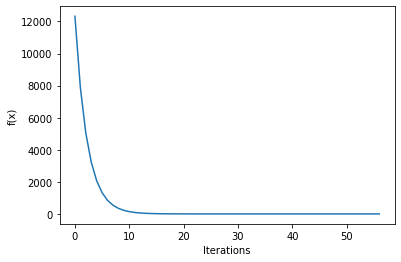

In [44]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(fvals_ret)
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.show()

Question 1.2  \\
Minimizer : x1 = -99.99958844 , x2 = 24.99994388 \\
Minimum function value: 1.7253033717248775e-07

Question 1.3

In [45]:
no_of_iterations=[]
for i in range(1,11):
  my_tol = 10**(-i)
  opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
  print("For my_tol :",my_tol)
  print('Final minimizer:',opt_x)
  print('Final objective function value ', fvals_ret[-1])
  no_of_iterations.append(len(fvals_ret))
  print('Number of iterations',len(fvals_ret))
  print()

For my_tol : 0.1
Final minimizer: [-99.9553787   24.99391528]
Final objective function value  0.0020280843668995063
Number of iterations 36

For my_tol : 0.01
Final minimizer: [-99.99520882  24.99934666]
Final objective function value  2.3382220797474075e-05
Number of iterations 46

For my_tol : 0.001
Final minimizer: [-99.99958844  24.99994388]
Final objective function value  1.7253033717248775e-07
Number of iterations 57

For my_tol : 0.0001
Final minimizer: [-99.99995581  24.99999397]
Final objective function value  1.989139359193299e-09
Number of iterations 67

For my_tol : 1e-05
Final minimizer: [-99.99999526  24.99999935]
Final objective function value  2.293321544605827e-11
Number of iterations 77

For my_tol : 1e-06
Final minimizer: [-99.99999959  24.99999994]
Final objective function value  1.6921726745458407e-13
Number of iterations 88

For my_tol : 1e-07
Final minimizer: [-99.99999996  24.99999999]
Final objective function value  1.950942200128245e-15
Number of iterations 98

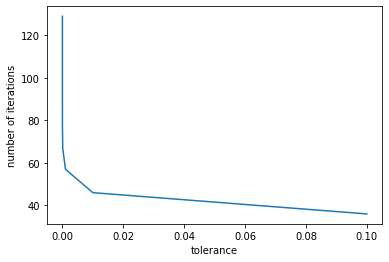

In [46]:
x = [10**(-i) for i in range(1,11)]
plt.plot(x , no_of_iterations)
plt.xlabel('tolerance')
plt.ylabel('number of iterations')
plt.show()

As the torlence value decreases the number of iterations to be performed to get the minimum value increases and the minimum value of function and value of minimizer decreases to optimum value 

Question 1.4

In [47]:
no_of_iterations=[]
my_start_x = np.array([10,10])
my_tol= 1e-5 
for my_steplength in [0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
  opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
  print("For steplength :",my_steplength)
  print('Final minimizer:',opt_x)
  print('Final objective function value ', fvals_ret[-1])
  no_of_iterations.append(len(fvals_ret))
  print('Number of iterations',len(fvals_ret))
  print()

For steplength : 0.0001
Final minimizer: [-99.99999505  24.99999932]
Final objective function value  2.49936770204995e-11
Number of iterations 84572

For steplength : 0.001
Final minimizer: [-99.99999505  24.99999933]
Final objective function value  2.494219709847674e-11
Number of iterations 8451

For steplength : 0.01
Final minimizer: [-99.99999512  24.99999933]
Final objective function value  2.4304673044883465e-11
Number of iterations 839

For steplength : 0.1
Final minimizer: [-99.99999526  24.99999935]
Final objective function value  2.293321544605827e-11
Number of iterations 77

For steplength : 0.2
Final minimizer: [-99.99999685  24.99999957]
Final objective function value  1.011747066175869e-11
Number of iterations 35

For steplength : 0.4
Final minimizer: [-99.99999775  24.99999969]
Final objective function value  5.169479687800271e-12
Number of iterations 12

For steplength : 0.5
Final minimizer: [-100.   25.]
Final objective function value  0.0
Number of iterations 2

For st

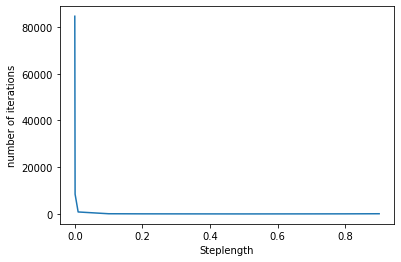

In [48]:
x = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
plt.plot(x , no_of_iterations)
plt.xlabel('Steplength')
plt.ylabel('number of iterations')
plt.show()

When steplength increases from 0.0001 to 0.5 the number of iterations decreases and the objective value decreases and is minimum at steplength 0.5. Also value of x1 deccreases till 0.5 and after that it increases and same for x2. 

When step length increases after 0.5 the number of iteration increases and the objective value also increases.



Question 1.5

In [49]:
no_of_iterations=[]
my_steplength = 0.1
my_tol= 1e-5 
t = []
c_name = ['Starting values',' Minimizer', 'Objective value', 'Number of iterations']
t.append(c_name)
for my_start_x in [np.array([10000,10000]),np.array([500,0]),np.array([0,1000]),np.array([1,1]),np.array([-500,-2])]:
  opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
  l = []
  print("For starting point :",my_start_x)
  l.append(my_start_x)
  print('Final minimizer:',opt_x)
  l.append(opt_x)
  print('Final objective function value ', fvals_ret[-1])
  l.append(fvals_ret[-1])
  l.append(len(fvals_ret))
  print('Number of iterations',len(fvals_ret))
  t.append(l)
  print()
print(tabulate(t, headers = 'firstrow', tablefmt = 'fancy_grid'))

For starting point : [10000 10000]
Final minimizer: [-99.99999679  25.00000317]
Final objective function value  2.0414342669998657e-11
Number of iterations 99

For starting point : [500   0]
Final minimizer: [-99.99999566  24.99999982]
Final objective function value  1.888746375147865e-11
Number of iterations 85

For starting point : [   0 1000]
Final minimizer: [-99.99999954  25.00000452]
Final objective function value  2.060780080476227e-11
Number of iterations 87

For starting point : [1 1]
Final minimizer: [-99.99999564  24.99999896]
Final objective function value  2.0052840841640608e-11
Number of iterations 77

For starting point : [-500   -2]
Final minimizer: [-100.00000452   24.99999969]
Final objective function value  2.055190630073527e-11
Number of iterations 83

╒═══════════════════╤═══════════════════════════════╤═══════════════════╤════════════════════════╕
│ Starting values   │  Minimizer                    │   Objective value │   Number of iterations │
╞══════════════════

The starting values does not have significant effect on number of iterations. And from table we can see that slope function is very steep.